In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
cd tools

/home/zehuany/cosegmentor/tools


In [3]:
run _init_paths.py

In [4]:
from fast_rcnn.train import get_training_roidb, train_net
from fast_rcnn.config import cfg, cfg_from_file, cfg_from_list, get_output_dir
from datasets.factory import get_imdb
import datasets.imdb
import caffe
import argparse
import pprint
import numpy as np
import sys
from shapely.geometry import Polygon, MultiPolygon
from pycocotools import mask 
import matplotlib.pyplot as plt
import PIL
import cv2
import skimage.io as sio
import roi_data_layer.roidb as mroi
import scipy.ndimage as simage

In [10]:
#gt=imdb.gt_roidb()
#print '%0.2f'% gt[1]['seg_areas'][20]iiiiii
#roidb=imdb.roidb
imdb=get_imdb('coco_2014_train')

loading annotations into memory...
Done (t=24.73s)
creating index...
index created!


In [11]:
roidb = get_training_roidb(imdb)
#imdb.append_flipped_images()
#names=[imdb.image_path_at(i) for i in xrange(len(imdb.image_index))]


Appending horizontally-flipped training examples...
coco_2014_train gt roidb loaded from /home/zehuany/cosegmentor/data/cache/coco_2014_train_gt_roidb.pkl
Loading MCG boxes
1 / 1
begin creatte boxes--------



AssertionError: 

In [12]:
len(roidb)
#roidb[i]['image']
#overlaps[inds]
#names.index('/home/zehuany/cosegmentor/data/coco/images/train2014/COCO_train2014_000000167126.jpg')

18

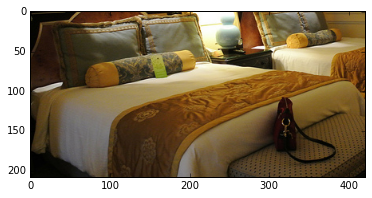

In [71]:
i=0
j=0
im =sio.imread(roidb[i]['image'])
box=roidb[i]['boxes'][j]
sim=im[box[1]:box[3]+1,box[0]:box[2]+1,:]
plt.imshow(sim)
plt.show()

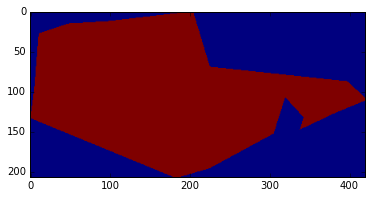

dtype('float32')

In [72]:
d=mask.decode(roidb[i]['segmentation'][j]).astype('float32')
plt.imshow(d.squeeze())
plt.show()
d.dtype

In [249]:
overlaps=roidb[i]['max_overlaps']
inds=np.where(overlaps>=cfg.TRAIN.FG_THRESH)[0]
sbox=roidb[i]['boxes'][inds]
sbox

array([[366,   0, 394,  65],
       [616,  19, 634,  87],
       [283,   3, 308,  62],
       [196,   4, 220,  57],
       [399,  14, 418,  64],
       [317,   5, 337,  63],
       [231,   8, 251,  59],
       [574,  32, 592,  81],
       [598,  13, 619,  82],
       [387, 227, 451, 380],
       [449, 218, 495, 357],
       [177,  10, 193,  58],
       [593,  37, 607,  82],
       [424,   2, 443,  70],
       [218, 194, 306, 351],
       [289, 141, 397, 251],
       [613,  26, 613,  30],
       [432,   9, 434,  22],
       [569,  27, 584,  80],
       [450, 221, 491, 352],
       [453, 221, 491, 352],
       [389, 228, 450, 360],
       [389, 218, 458, 374],
       [394, 228, 450, 360],
       [389, 218, 458, 360],
       [389, 228, 450, 345],
       [453, 234, 491, 352],
       [389, 228, 450, 374],
       [389, 228, 455, 346]], dtype=uint16)

In [153]:
m= simage.interpolation.zoom(input=d, zoom=(30./d.shape[0],30./d.shape[1],d.shape[2]), order = 2)
m.dtype
names

dtype('uint8')

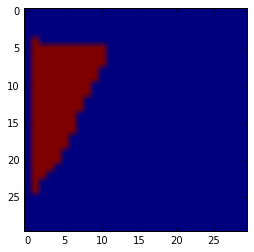

(30, 30, 1)

In [154]:
plt.imshow(m.squeeze())
plt.show()
m.shape

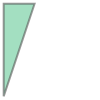

In [46]:
Polygon([(240,127.7638011695907), (240,133), (241.7462506094588,133), (240,127.7638011695907),(240,127.7638011695907)])

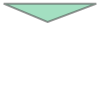

In [47]:
Polygon([(248.7420532319392,133), (249.0965189873417,133), (248.91,132.93), (248.7420532319392,133)])

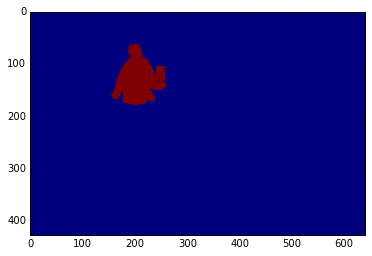

In [38]:
prle = mask.frPyObjects([[157.91,157.13, 166.33,128.72, 174.22,108.73, 184.74,94.01000000000001, 191.58 ,88.75, 186.84 ,79.28, 188.42 ,65.08, 199.99 ,61.92, 207.36, 62.97, 211.56 ,74.02, 214.19 ,86.64, 224.71 ,93.48, 235.76 ,115.05, 242.6, 135.56, 248.91, 132.93, 257.33, 136.09, 259.96, 144.5, 250.49, 150.29, 239.44 ,149.76, 227.87, 149.24, 237.86 ,162.39, 237.86 ,170.8, 223.14, 171.33, 218.4 ,177.64, 207.88, 177.64, 202.62, 179.74, 177.37, 174.48, 176.85, 151.34, 172.64, 159.23, 167.91, 167.65, 158.96, 167.65, 153.18, 157.13, 157.91, 157.13]],427,640)
grle = mask.frPyObjects([[240, 105, 240, 133, 257, 133, 257, 105, 240 ,105]],427,640)
a=mask.merge([prle[0],grle[0]])
d=mask.decode([a])
plt.imshow(mask.decode([a]).squeeze())
plt.show()

In [41]:
names=[roidb[i]['image'] for i in xrange(len(roidb))]
names

['/home/zehuany/cosegmentor/data/coco/images/train2014/COCO_train2014_000000131074.jpg',
 '/home/zehuany/cosegmentor/data/coco/images/train2014/COCO_train2014_000000131075.jpg',
 '/home/zehuany/cosegmentor/data/coco/images/train2014/COCO_train2014_000000393221.jpg',
 '/home/zehuany/cosegmentor/data/coco/images/train2014/COCO_train2014_000000393223.jpg',
 '/home/zehuany/cosegmentor/data/coco/images/train2014/COCO_train2014_000000393224.jpg',
 '/home/zehuany/cosegmentor/data/coco/images/train2014/COCO_train2014_000000524297.jpg',
 '/home/zehuany/cosegmentor/data/coco/images/train2014/COCO_train2014_000000393227.jpg',
 '/home/zehuany/cosegmentor/data/coco/images/train2014/COCO_train2014_000000393228.jpg',
 '/home/zehuany/cosegmentor/data/coco/images/train2014/COCO_train2014_000000262146.jpg',
 '/home/zehuany/cosegmentor/data/coco/images/train2014/COCO_train2014_000000131074.jpg',
 '/home/zehuany/cosegmentor/data/coco/images/train2014/COCO_train2014_000000131075.jpg',
 '/home/zehuany/coseg

In [195]:
run tools/test_gradient_checker.py

MaskRegLayer: name_to_top: {'loss': 0}
hello


.
----------------------------------------------------------------------
Ran 1 test in 1.395s

OK


In [191]:
'%f\n' % 0.2

'0.200000\n'

In [71]:
a=[1,2,3,4]
a[1:]

[2, 3, 4]

In [6]:
import pickle

In [66]:
with open('../shape_1.pkl','r') as f:
    shape1=pickle.load(f)

In [16]:
shape1

array([[  1.84467441e+19,   1.84467441e+19,   1.84467441e+19, ...,
          1.84467441e+19,   1.84467441e+19,   1.84467441e+19],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00]], dtype=float32)

In [67]:
c=np.reshape(shape1[0,:],(30,30))

In [68]:
plt.imshow(c)

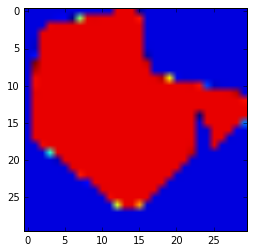

In [69]:
plt.show()

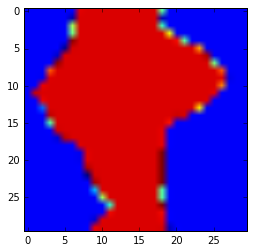

In [65]:
with open('../base_1.pkl','r') as f:
    base0=pickle.load(f)
c=np.reshape(base0[0,:],(30,30))
plt.imshow(c)
plt.show()

In [53]:
np.max(shape1)

1.8446744e+19

In [57]:
shape1.dtype

dtype('float32')

In [60]:
n=np.array([1,-1],dtype='uint64')

array([0], dtype=uint64)

In [70]:
a=

array([[-1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -0.99999988,  0.99997234,  1.        ,  1.        ,
        -1.14723253, -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ],
       [-1.        , -1.        , -1.        , -0.99997163, -0.96983385,
        -0.95034862, -1.18316984,  0.0481782 ,  0.9960165 ,  1.00481272,
         1.00014138,  0.99997842,  1.        ,  1.        ,  1.        ,
         0.94797838, -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ],
       [-1.        , -1.        , -1.00025082,  0.9878453 ,  0.99999499,
         0.99999368,  1.00000095,  0.99999988,  1